In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import re
import seaborn

seaborn.set_context({"figure.figsize": (12, 8)})

In [2]:
def parse_iloci(gff3):
    for line in gff3:
        if '\tlocus\t' not in line:
            continue
        values = line.split('\t')
        start = int(values[3])
        end = int(values[4])
        length = end - start + 1
        typematch = re.search('iLocus_type=([^;\n]+)', values[8])
        assert typematch, values[8]
        locustype = typematch.group(1)
        yield length, locustype

In [3]:
def draw_plot(data, series, groupby, ptype='violin', order=None,
              xlabel=None, ylabel=None, ylim=None, yticks=None,
              yticklabs=None, palette=None):
    """
    Boilerplate code I've copied/pasted from various personal notes.
    """
    # Draw and style the plot
    if ptype == 'violin':
        plot = seaborn.violinplot(x=groupby, y=series, data=data,
                                  order=order, palette=palette)
    elif ptype == 'boxplot':
        plot = data.boxplot(series, by=groupby)
    else:
        assert False, 'unknown plot type "%s"' % ptype
    if xlabel is not None:
        _ = plot.set_xlabel(xlabel)
    if ylabel is not None:
        _ = plot.set_ylabel(ylabel)
    if yticks is not None:
        _ = plot.set_yticks(yticks)
    if yticklabs is not None:
        _ = plot.set_yticklabels(yticklabs)
    if ylim:
        plot.set_ylim(ylim[0], ylim[1])
    
    # Cleanup
    seaborn.despine(left=True)
    _ = matplotlib.pyplot.title("")
    _ = matplotlib.pyplot.suptitle("")
    for item in ([plot.xaxis.label, plot.yaxis.label] +
                  plot.get_xticklabels() + plot.get_yticklabels()):
        item.set_fontsize(16)

In [4]:
with open('Dmel.iloci.gff3', 'r') as dmelin, \
     open('Dpul.iloci.gff3', 'r') as dpulin, \
     open('DmelDpul.iloci.tsv', 'w') as outfile:
    print('Species', 'Length', 'LocusType', sep='\t', file=outfile)
    for length, locustype in parse_iloci(dmelin):
        print('Dmel', length, locustype, sep='\t', file=outfile)
    for length, locustype in parse_iloci(dpulin):
        print('Dpul', length, locustype, sep='\t', file=outfile)

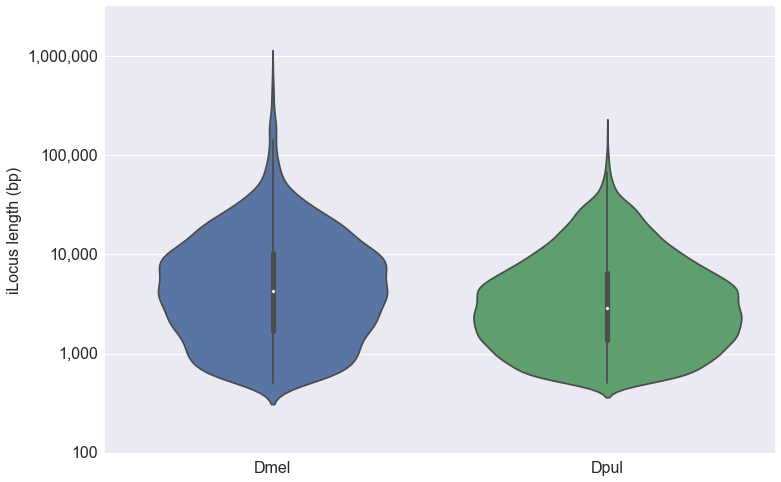

In [5]:
data = pandas.read_table('DmelDpul.iloci.tsv')
data['LogLength'] = numpy.log10(data['Length'])

iiloci = data.loc[(data.LocusType == 'iiLocus')]
draw_plot(iiloci, 'LogLength', 'Species', xlabel='',
          ylabel='iLocus length (bp)', yticks=[2, 3, 4, 5, 6],
          yticklabs=['100', '1,000', '10,000', '100,000', '1,000,000'])

In [6]:
dmelavg = iiloci.loc[(data.Species == 'Dmel')]['Length'].mean()
dmelmed = iiloci.loc[(data.Species == 'Dmel')]['Length'].median()
print('Dmel: average={:.2f} bp, median={} bp'.format(dmelavg, dmelmed))

Dmel: average=10333.60 bp, median=4275.0 bp


In [7]:
dpulavg = iiloci.loc[(data.Species == 'Dpul')]['Length'].mean()
dpulmed = iiloci.loc[(data.Species == 'Dpul')]['Length'].median()
print('Dpul: average={:.2f} bp, median={} bp'.format(dpulavg, dpulmed))

Dpul: average=5756.47 bp, median=2899.0 bp
